# 타이타닉호 생존율 분석( 상관분석)


* 데이터 분석 방법
1. 목표설정: 타이타닉호의 생존자 관련 데이터를 이용하여 생존 성녈, 나이 좌석등급과의 상관관계를 확인한다.
2. 데이터수집 : Seaborn  내장 데이터셋(titanic)
3. 데이터 탐색 및 준비 : 정보확인,  Null값 치환
4. 데이터 모델링 및 시각화

	가. 성별에 따른 생존율 파이차트

	나. 객실등급에 따른 생존자 수 bar차트(countplot)

	다. 객실등급과 생존의 상관관계를 나타내는 Catplot()

	라. 피어슨 상관계수 구하기

	마. 상관분석결과 히트맵으로 시각화(heatmap())



* 데이터 : seaborn 내장데이터셋(titanic)


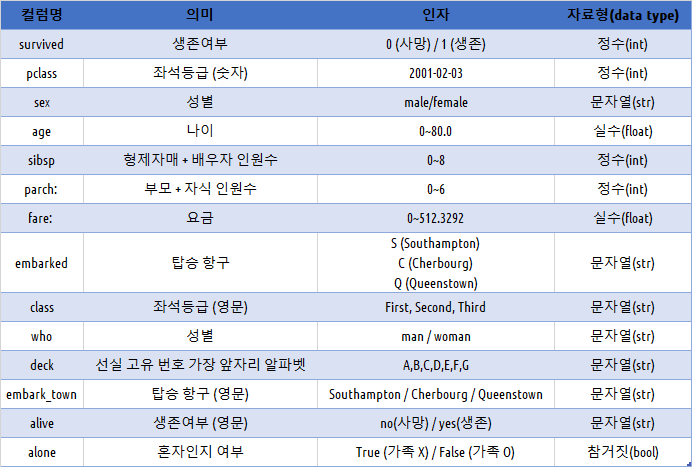

##  1.데이터 탐색 및 준비

In [ ]:
# 라이브러리 로드
import seaborn as sns
import pandas as pd

In [ ]:
#데이터 수집
titanic = sns.load_dataset("titanic")
#titanic
#데이터를 csv로 저장
titanic.to_csv('titanic.csv',index=False)

In [ ]:
#데이터 탐색
# 1. 데이터 확인
titanic.head(100)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
97,1,1,male,23.0,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False
98,1,2,female,34.0,0,1,23.0000,S,Second,woman,False,NaN,Southampton,yes,False


In [ ]:
# 2. 데이터 사이즈 확인
titanic.shape

(891, 15)

In [ ]:
# 3.데이터 기본정보확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# 3-2.데이터 결측값 확인
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- [age] : float64 -> 중앙값으로 치환
- [embarked] : object -> 최빈값으로 치환
- [deck] : category -> 최빈값으로 치환
- [embark_town] : object -> 최빈값으로 치환

In [ ]:
# 중앙값 치환
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# [embarked] ,[deck] ,[embark_town]의 최빈값을 확인
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
# [embarked] ,[deck] ,[embark_town]의 최빈값 치환
titanic['embarked']=titanic['embarked'].fillna('S')
titanic['deck']=titanic['deck'].fillna('C')
titanic['embark_town']=titanic['embark_town'].fillna('Southampton')
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

## 2.데이터 모델링 및 시각화

###가.성별에 따른 생존률 파이 차트 (pie())

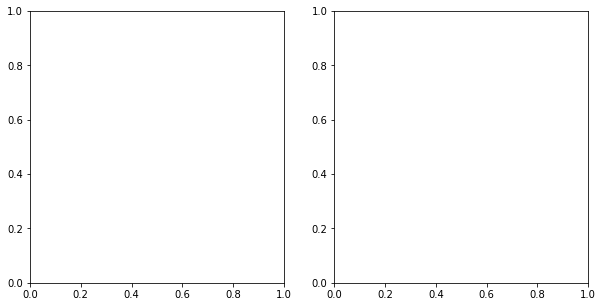

In [ ]:
# 한줄에 2개 차트를 그리도록 크기 설정
f, ax = plt.subplots(1,2,figsize=(10,5))

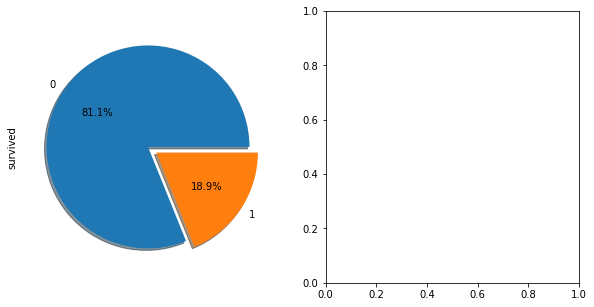

In [ ]:
f, ax = plt.subplots(1,2,figsize=(10,5))
titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(
    explode = [0,0.1],autopct = '%1.1f%%',ax = ax[0],shadow=True)

Text(0.5, 1.0, 'Survived(Female)')

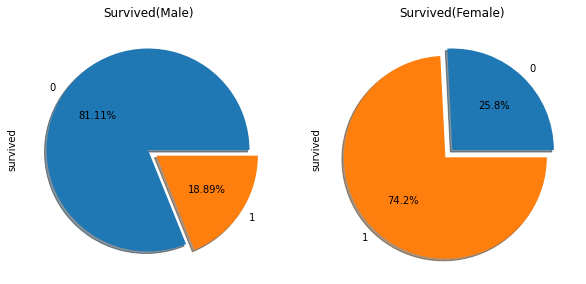

In [ ]:
f, ax = plt.subplots(1,2,figsize=(10,5))

#1번째 그래프
titanic['survived'][titanic['sex']=='male'].value_counts().sort_index().plot.pie(
    explode=[0,0.1], autopct = '%1.2f%%',ax = ax[0],shadow=True)

ax[0].set_title('Survived(Male)')

#2번째 그래프
titanic['survived'][titanic['sex']=='female'].value_counts().sort_index().plot.pie(
     explode=[0,0.1], autopct = '%1.1f%%',ax = ax[1],shadow=True)

ax[1].set_title('Survived(Female)')


### 나.객실등급에 따른 생존자 수 바차트 (countplot())

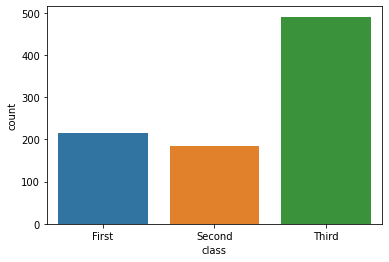

In [ ]:
# data는 데이터프레임만 사용가능
sns.countplot(x="class", data=titanic)


Text(0.5, 1.0, 'Pclass vs Survived')

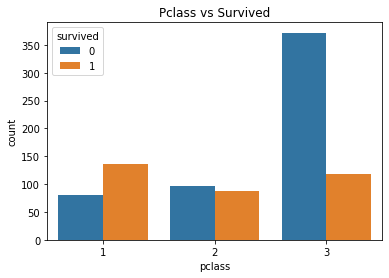

In [ ]:
sns.countplot(x='pclass',
              hue = 'survived',
              data = titanic)
plt.title('Pclass vs Survived')

###다.객실등급과 생존의 상관관계를 나타내는 catplot()


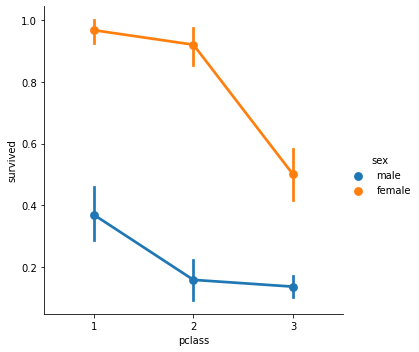

In [ ]:
sns.catplot(x='pclass',
            y='survived',
            hue='sex',
            data=titanic,
            kind = 'point')

### 라.상관분석결과 히트맵으로 시각화(heatmap())
- [survived],[sex],[age_categrory],[family],[pclass], [fare] 항목비교
- age_categrory는  age를 10대이하(0), 10대(1) ~ 70대(7)로 나누어 age2 열에 추가
- 성별을 male/female을 1/0으로 치환
- 가족의 수를 구하여 fmily열에 추가 

In [ ]:
#age_categrory는  age를 10대이하(0), 10대(1) ~ 70대(7)로 나누는 함수
def category_age(x):
    if x < 10:
        return 0
    elif x < 20 :
        return 1
    elif x < 30 :
        return 2
    elif x < 40 :
        return 3
    elif x < 50 :
        return 4
    elif x < 60 :
        return 5
    elif x < 70 :
        return 6
    else :
        return 7

In [ ]:
# age_categrory 저장
titanic['age2'] = titanic['age'].apply(category_age)

# 성별을 male/female을 1/0으로 치환
titanic['sex']= titanic['sex'].map({'male':1,'female':0})

# 가족의 수를 구하여 family열에 추가 
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2,1


In [ ]:
# 히트맵에 사용할 데이터 추출
heatmap_data = titanic[['survived','sex','age2','family','pclass','fare']]
heatmap_data

,survived,sex,age2,family,pclass,fare
0,0,1,2,2,3,7.2500
1,1,0,3,2,1,71.2833
2,1,0,2,1,3,7.9250
3,1,0,3,2,1,53.1000
4,0,1,3,1,3,8.0500
...,...,...,...,...,...,...
886,0,1,2,1,2,13.0000
887,1,0,1,1,1,30.0000
888,0,0,2,4,3,23.4500
889,1,1,2,1,1,30.0000


In [ ]:
# 히트맵 색상맵 지정
colormap = plt.cm.seismic

https://matplotlib.org/stable/tutorials/colors/colormaps.html


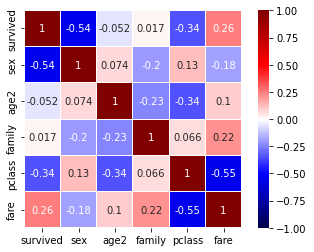

In [ ]:
# 히트맵 작성
sns.heatmap(heatmap_data.astype(float).corr(), 
            linewidths = 0.1,
            vmin = -1,
            vmax=1.0,
            square=True, 
            linecolor='white', 
            annot = True, 
            annot_kws= {"size":10},
            cmap= colormap)